<a href="https://colab.research.google.com/github/shivansh2310/WQU-Files/blob/main/Index_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
!pip install yfinance


In [100]:
import datetime
import numpy as np
import pandas_datareader.data as web
import yfinance as yfin
yfin.pdr_override()

In [101]:
start = datetime.date(2015, 10, 23)
end = datetime.date(2023, 10, 22)
df = web.DataReader(["^NSEI", "XU030.IS", "FTSEMIB.MI", "PSI20.LS"], start, end)["Adj Close"]

[*********************100%%**********************]  4 of 4 completed


In [102]:
df.head(10)

,FTSEMIB.MI,PSI20.LS,XU030.IS,^NSEI
Date,,,,
2015-10-23,22737.0,5423.060059,98471.000000,8295.450195
2015-10-26,22630.0,5411.520020,97522.500000,8260.549805
2015-10-27,22370.0,5297.569824,96889.101562,8232.900391
2015-10-28,22686.0,5369.689941,96907.398438,8171.200195
2015-10-29,22443.0,5451.770020,NaN,8111.750000
2015-10-30,22443.0,5468.689941,98213.000000,8065.799805
2015-11-02,22482.0,5506.750000,103593.601562,8050.799805
2015-11-03,22459.0,5567.270020,102488.000000,8060.700195
2015-11-04,22313.0,5590.950195,103434.101562,8040.200195


In [103]:
df.describe()

,FTSEMIB.MI,PSI20.LS,XU030.IS,^NSEI
count,2033.000000,2037.000000,1993.000000,1969.000000
mean,22100.859321,5213.605952,71372.185938,12618.228475
std,3203.638846,537.462947,57089.756696,3691.715755
min,14894.000000,3596.080078,1170.800049,6970.600098
25%,19740.000000,4841.620117,3011.600098,9886.349609
50%,21935.000000,5221.720215,95592.500000,11346.200195
75%,24280.000000,5590.859863,121995.398438,16416.349609
max,29645.000000,6349.209961,149678.703125,20192.349609


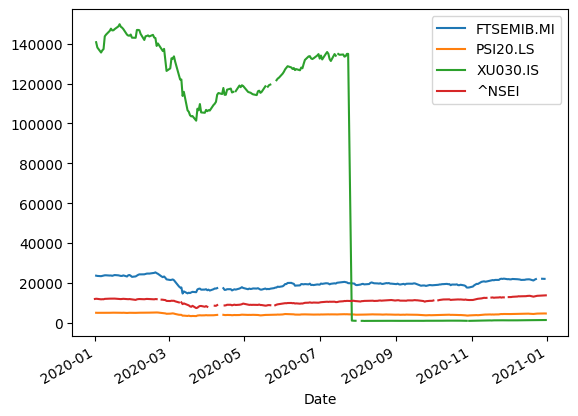

In [104]:
df["2020-01-01":"2020-12-31"].plot();

In [105]:
np.round(df.tail(3), 3)

,FTSEMIB.MI,PSI20.LS,XU030.IS,^NSEI
Date,,,,
2023-10-18,28136.0,6147.03,8202.4,19671.100
2023-10-19,27747.0,6111.28,8093.5,19624.699
2023-10-20,27357.0,6039.46,7838.6,19542.650


In [106]:
df = df.join(web.DataReader(["BTC-USD"], start, end)["Adj Close"])
df.rename(columns={"Adj Close": "BTC"}, inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [110]:
df = np.log(df) - np.log(df.shift(1))

In [111]:
df.head()

,FTSEMIB.MI,PSI20.LS,XU030.IS,^NSEI,BTC
Date,,,,,
2015-10-23,NaN,NaN,NaN,NaN,NaN
2015-10-26,-0.004717,-0.002130,-0.009679,-0.004216,0.031345
2015-10-27,-0.011556,-0.021282,-0.006516,-0.003353,0.029317
2015-10-28,0.014027,0.013522,0.000189,-0.007523,0.036200
2015-10-29,-0.010769,0.015170,NaN,-0.007302,0.029873


In [113]:
df = df.iloc[1:, :5]

In [114]:
df.head()

,FTSEMIB.MI,PSI20.LS,XU030.IS,^NSEI,BTC
Date,,,,,
2015-10-26,-0.004717,-0.002130,-0.009679,-0.004216,0.031345
2015-10-27,-0.011556,-0.021282,-0.006516,-0.003353,0.029317
2015-10-28,0.014027,0.013522,0.000189,-0.007523,0.036200
2015-10-29,-0.010769,0.015170,NaN,-0.007302,0.029873
2015-10-30,0.000000,0.003099,NaN,-0.005681,0.044128


In [116]:
df = df.dropna()
df.head()

,FTSEMIB.MI,PSI20.LS,XU030.IS,^NSEI,BTC
Date,,,,,
2015-10-26,-0.004717,-0.002130,-0.009679,-0.004216,0.031345
2015-10-27,-0.011556,-0.021282,-0.006516,-0.003353,0.029317
2015-10-28,0.014027,0.013522,0.000189,-0.007523,0.036200
2015-11-02,0.001736,0.006936,0.053337,-0.001861,0.096342
2015-11-03,-0.001024,0.010930,-0.010730,0.001229,0.110569


In [117]:
df.describe()

,FTSEMIB.MI,PSI20.LS,XU030.IS,^NSEI,BTC
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000
mean,0.000110,0.000003,-0.001544,0.000358,0.002059
std,0.014761,0.010983,0.112305,0.010702,0.044926
min,-0.185461,-0.102671,-4.604051,-0.139038,-0.464730
25%,-0.006183,-0.005428,-0.007352,-0.004365,-0.015252
50%,0.000824,0.000427,0.001409,0.000693,0.001917
75%,0.007239,0.005940,0.010194,0.005918,0.020885
max,0.085505,0.075324,0.080419,0.064145,0.225119


In [119]:
df.mean() * 100

FTSEMIB.MI    0.011007
PSI20.LS      0.000346
XU030.IS     -0.154416
^NSEI         0.035831
BTC           0.205907
dtype: float64

In [120]:
np.exp(df.mean() * 252 * 10) * 1000

FTSEMIB.MI      1319.653423
PSI20.LS        1008.749800
XU030.IS          20.419082
^NSEI           2466.831432
BTC           179262.027906
dtype: float64

In [121]:
df.max()

FTSEMIB.MI    0.085505
PSI20.LS      0.075324
XU030.IS      0.080419
^NSEI         0.064145
BTC           0.225119
dtype: float64

In [122]:
df.min()

FTSEMIB.MI   -0.185461
PSI20.LS     -0.102671
XU030.IS     -4.604051
^NSEI        -0.139038
BTC          -0.464730
dtype: float64

In [123]:
df.max() - df.min()

FTSEMIB.MI    0.270966
PSI20.LS      0.177994
XU030.IS      4.684470
^NSEI         0.203183
BTC           0.689849
dtype: float64

In [124]:
from datetime import date
currYear = df.loc[
    date.today() - datetime.timedelta(365) : date.today()  # noqa E203
]
currYear.max() - currYear.min()

FTSEMIB.MI    0.072316
PSI20.LS      0.047054
XU030.IS      0.172485
^NSEI         0.033448
BTC           0.254824
dtype: float64

In [125]:
(currYear.max() - currYear.min()) / df.iloc[-1]

FTSEMIB.MI   -5.108796
PSI20.LS     -3.980319
XU030.IS     -5.389993
^NSEI        -7.983358
BTC           7.725267
dtype: float64

In [126]:
((abs(df - df.rolling(50).mean())) / df).mean()

FTSEMIB.MI         inf
PSI20.LS     -0.591065
XU030.IS           inf
^NSEI              inf
BTC                inf
dtype: float64

In [127]:
df.std()

FTSEMIB.MI    0.014761
PSI20.LS      0.010983
XU030.IS      0.112305
^NSEI         0.010702
BTC           0.044926
dtype: float64

In [128]:
import pandas as pd

def investCompare(startTime, endTime, tickers):
    # pull price data from yahoo -- (list(tickers.keys())) = ['^GSPC','^RUT']
    prices = web.DataReader(list(tickers.keys()), startTime, endTime)["Adj Close"]
    prices = prices.rename(columns=tickers)
    returns = np.log(prices) - np.log(prices.shift(1))
    returns = returns.iloc[1:, 0:]

    # pull data into separate DataFrame, 52weeks to just look at the last 365 days of
    # data for calculating our high/low metric
    currYear = prices.loc[
        date.today() - datetime.timedelta(365) : date.today()  # noqa E203
    ]
    highLow = (currYear.max() - currYear.min()) / prices.iloc[-1]
    highLow = pd.DataFrame(highLow, columns=["HighMinusLow"])

    # Moving average volatility
    MA = pd.DataFrame(
        ((abs(prices - prices.rolling(50).mean())) / prices).mean(),
        columns=["MovingAverageVolatility"],
    )

    investments = pd.merge(highLow, MA, left_index=True, right_index=True)
    investments = pd.merge(
        investments,
        pd.DataFrame(returns.std(), columns=["StandardDeviation"]),
        left_index=True,
        right_index=True,
    )
    investments = pd.merge(
        investments,
        pd.DataFrame(100 * returns.mean(), columns=["Daily Return Percentage"]),
        left_index=True,
        right_index=True,
    )

    return investments.round(3)

In [133]:
investCompare(
    datetime.date(2015, 10, 23),
    datetime.date.today(),
    dict({"FTSEMIB.MI": "Italy", "^NSEI": "India", "PSI20.LS": "Spain", "XU030.IS": "Turkey", "BTC": "Bitcoin"}),
)

[*********************100%%**********************]  5 of 5 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Bitcoin,0.046,0.005,0.002,-0.003
Italy,0.222,0.042,0.014,0.017
Spain,0.143,0.032,0.011,0.012
Turkey,0.472,0.059,0.105,-0.128
India,0.210,0.030,0.011,0.051
